# Golden Boot Winners

Plot of Golden Boot winners' running goal total through winning Premier League season

## Goal

The idea here is to obtain data on the goals scored by each player that won a Golden Boot during the season the player won the award. Then running total/cumulative sum plots will be generated with this data so that the winner's goal scoring trajectories can be compared.

## Inspiration

Inspiration is taken from the following plot posted on reddit:

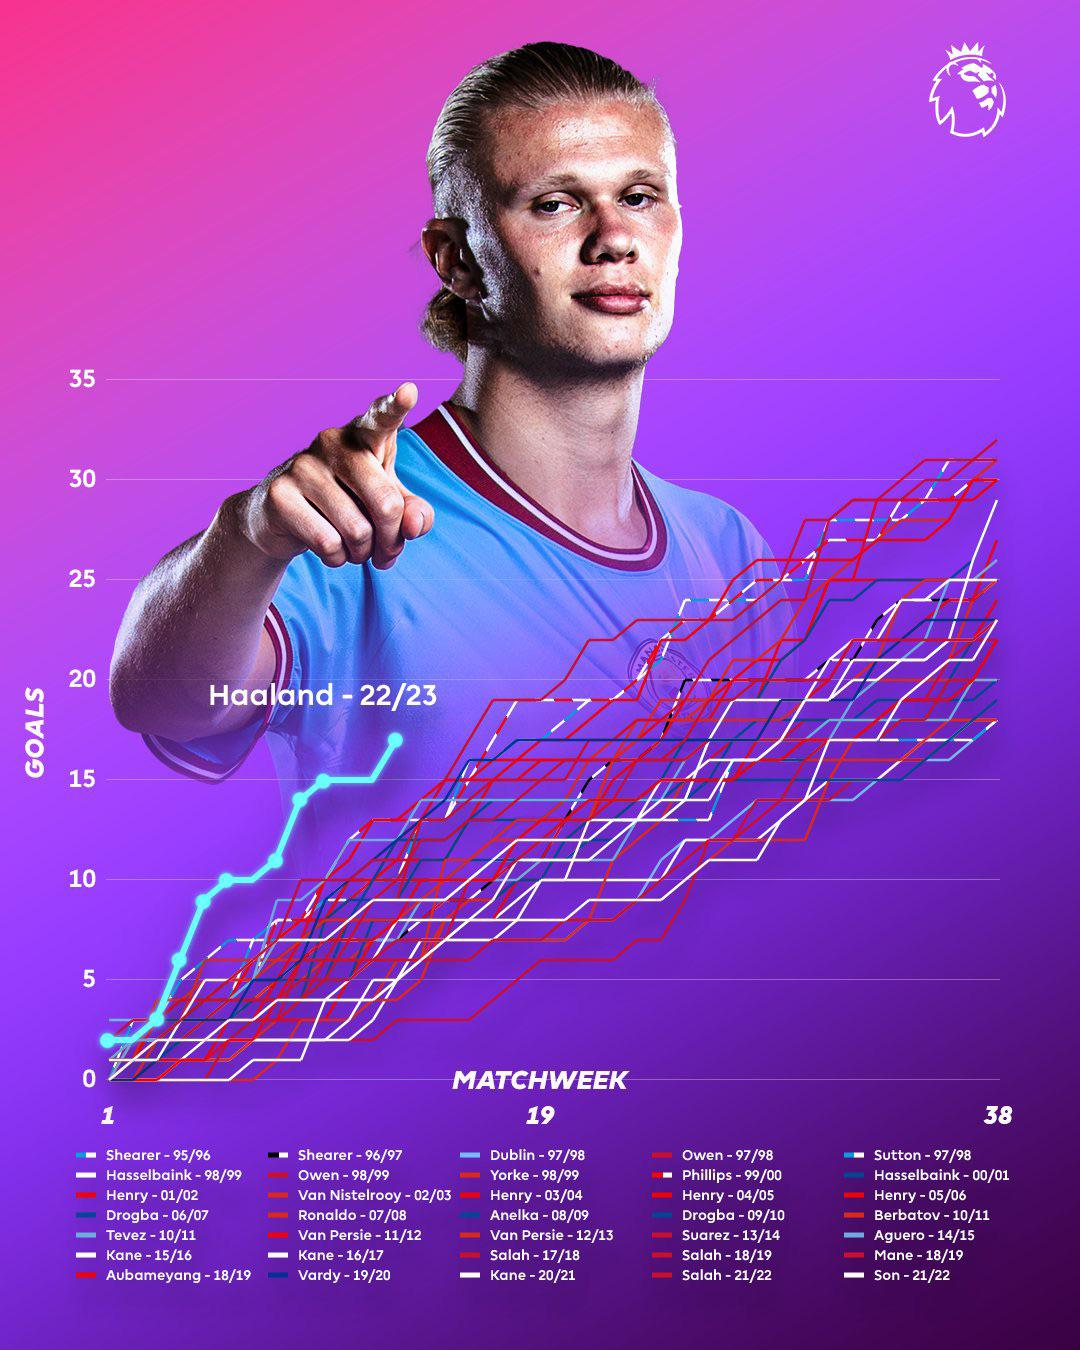

## Challenges

Many people pointed out glaring issues with the above plot. It is difficult to discern players other than Haaland from each othe  and due to common color schemes, it is hard to even tell the lines apart in some places. Furthermore, the legend is ordered in a less intuitive manner. Another issue is the choice of plotting goal sum against matchweek. Due to game rescheduling that can occur during a season, matchweeks can sometimes be moved to different dates such that the Matchweeks do not occur in order which can give a false impression as to how many goals are scored by various points in the season. Not to mention the matchweek reordering is not of the players doing and so comparisons can leave some players unfairly advantaged/disadvantaged.

These things aside, there are more general challenges with making plots like this. First off, player trajectories do not vary by large quantities. It is uncommon for players to score 3 or more goals in a single match let alone multiple matches and therefore differences in trajectories are often small. This leads to a lot of overlapping of lines as seen in the plot above. Another challenge is choosing informative colors for the players that also solves the issue of have many players represented by colors that are too similar to tell apart.

### Summary of improvements to implement

* Reduce plot clutter. Seperate the trajectories
* Make it easier to visually distinguish players label and plot line.
* Plot info easier to read. Make it easier to be able to read and extract the goal sum values and dates from the plot and legend
  * Provide visual cues to help locate player line and info
* Asist player/season comparisons

## Getting the data

There are multiple ways to get Premier League player stats. A common solution is to use an api. Choosing this option means searching for an api that has up to date info, doesnt have debilitating usage restrictions, and is free or not too pricey. One also like has to incorporate additional tools for connecting and providing credentials to the api.

### A simpler approach : webscrapping

Most of the data we need is readility viewable in tables on multiple sites across the web. Some of these sites are even structured in a manner that can facilitate webscrapping. It turns out that the data can be obtained and put into lists/arrays/tables with just a few lines of python code.

However, not all is good. The data will need to be cleaned and properly formated.

## Making the plot

One way to open up doors to more possibilities - in regards to overcoming the aformentioned challenges - is to make the plot interactive.

The following cells will scrape data from wikipedia and FBRef.com and put them into tables, one for each player. 

In [1]:
import pandas as pd
import os
import io
import matplotlib.pyplot as plt
import requests
import numpy as np
from bs4 import BeautifulSoup

In [2]:
#Filenames for html and css file creation and saving
html_filename = "index.html"
generated_css_filename = "style.css"
base_css_filename = "golden-boot-base.css"
javascript_filename = 'golden-boot.js'

#Parameters used to customize generated html and css contents
page_title = 'Premier League Golden Boot Winners'
page_description = 'Golden Boot Winners Goals: Running Total'
background_image_url = 'https://pbs.twimg.com/media/D5G92AqW4AEaJlk.jpg:large'
gradient_color = "#f4ab49"
xlabel_color = "#2f4f4f"
ylabel_color = "white"
gridline_color = ylabel_color
team_colors = { 'Blackburn Rovers': ['#009EE0', '#FFFFFF'],\
                'Newcastle United': ['#241F20', '#FFFFFF'],\
                'Coventry City': ['#77bbff', '#FFFFFF'],\
                'Liverpool': ['#C8102E', '#F6EB61'],\
                'Manchester United': ['#DA291C', '#FBE122'],\
                'Leeds United': ['#1D428A', '#FFCD00'],\
                'Sunderland': ['#000000', '#ff0000'],\
                'Chelsea': ['#034694', '#dba111'],\
                'Arsenal': ['#db0007', '#9c824a'],\
                'Manchester City': ['#6CABDD', '#FFFFFF'],\
                'Tottenham Hotspur': ['#132257', '#FFFFFF'],\
                'Leicester City': ['#003090', '#FDBE11'] }

In [3]:
#Parameters for adding a player's stats for non-Golden-Boot-winning season
add_additional_player = True
highlight_additional_player = False
#Make sure name and team matches Golden Boot Winners table. 
#Also the dash in the date needs to be the special dash '–' not the regular one '-'
additional_player_info = {'name': 'Mohamed Salah', 'team': 'Liverpool', 'season': '2022–23'}
rows_to_drop = 3

#Data source url related stuff
url = 'https://en.wikipedia.org/wiki/Premier_League_Golden_Boot'
src_ending_str = '-Match-Logs'
#The player id's can be found in the url of the player's page on FBREF.com
player_fbref_id = { 'Erling Haaland': '1f44ac21',\
                    'Alan Shearer': '438b3a51',\
                    'Chris Sutton': '83c38e36',\
                    'Dion Dublin': 'a0886d18',\
                    'Michael Owen': '88b3f52c',\
                    'Dwight Yorke': '2d0a99d3',\
                    'Jimmy Floyd Hasselbaink': 'db8a04d1',\
                    'Kevin Phillips': '23d97ca1',\
                    'Thierry Henry': 'c0c5ee74',\
                    'Ruud van Nistelrooy': '80a30989',\
                    'Didier Drogba': '945dea33',\
                    'Cristiano Ronaldo': 'dea698d9',\
                    'Nicolas Anelka': '931ed5e9',\
                    'Carlos Tevez': 'c1a26d43',\
                    'Dimitar Berbatov': 'f5781978',\
                    'Robin van Persie': '3fcab3a8',\
                    'Luis Suárez': 'a6154613',\
                    'Sergio Agüero': '4d034881',\
                    'Pierre Emerick Aubameyang': 'd5dd5f1f',\
                    'Sadio Mané': 'c691bfe2',\
                    'Jamie Vardy': '45963054',\
                    'Son Heung min': '92e7e919',\
                    'Mohamed Salah': 'e342ad68',\
                    'Harry Kane': '21a66f6a' }

In [4]:
#Adds new row to the table containing the info for 
#the player being added
if add_additional_player :
    folder_name = '-'.join(additional_player_info['name'].split(' '))

In [5]:
#Get html content from website containing data table
html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')

#Read in the data in the table with the title 'Premier League Golden Boot winners'
#and put the data in a pandas dataframe
df = pd.read_html(html_content,  match='Premier League Golden Boot winners')

In [6]:
#Remove unwanted rows from beginning of the table
#-Note: from here on out the dataframe is in 'table' variable
table = df[0].drop(range(rows_to_drop), axis=0)
table.reset_index()
table.iat[8,0] = table.iat[8,0].replace('20','')

#Display table
table

,Season,Player,Nationality,Club,Goals,Games[B],Rate,Ref(s)
3,1995–96,Alan Shearer (2),England,Blackburn Rovers,31,35,0.89,[8][23]
4,1996–97,Alan Shearer (3),England,Newcastle United,25,31,0.81,[8][23]
5,1997–98,Chris Sutton,England,Blackburn Rovers,18,35,0.51,[8]
6,1997–98,Dion Dublin,England,Coventry City,18,36,0.50,[8][24]
7,1997–98,Michael Owen,England,Liverpool,18,36,0.50,[8]
8,1998–99,Michael Owen (2),England,Liverpool,18,30,0.60,[8]
9,1998–99,Dwight Yorke,Trinidad and Tobago,Manchester United§,18,33,0.55,[25]
10,1998–99,Jimmy Floyd Hasselbaink,Netherlands,Leeds United,18,36,0.50,[8]
11,1999–00,Kevin Phillips,England,Sunderland,30,36,0.83,[10][26]
12,2000–01,Jimmy Floyd Hasselbaink (2),Netherlands,Chelsea,23,35,0.66,[27]


In [7]:
#Test: remove the parenthesis portion of some 
#of the names along with the spaces and connect
#the names with dashes instead.
#-Note: the logic here can probably be simplified
player_name_c = table.iat[22,1].split('(')[0].split(' ')

player_name = ''
if (player_name_c[-1] == ''):
    player_name = '-'.join(player_name_c[0:-1])
else:
    player_name = '-'.join(player_name_c)

player_name

'Robin-van-Persie'

In [8]:
#Generates the url where the data 
#(premier league season stats) can be found 
def sourceURL(name, player_code, season):
        begin, end = season.split('–')
        if (end != '00'):
            new_date = '' + begin + '-' + begin[0:2] + end
        else:
            new_date = '' + begin + '-20' + end
        return 'https://fbref.com/en/players/' + player_code + '/matchlogs/' + new_date + '/c9/summary/' + name + src_ending_str

In [9]:
#Adds addition player to end of table
#and because we cut out the first 3 rows of the table,
#the table now starts at 3 instead of 0 and so
#we add 3 to the index of the row we are adding.  
if (add_additional_player):
    table.loc[len(table) + 3] = [additional_player_info['season'], additional_player_info['name'], 'n/a', additional_player_info['team'], 0, 0, 0, '[]']

In [10]:
#Display table (reminder: use semi-colon to hide output)
table

,Season,Player,Nationality,Club,Goals,Games[B],Rate,Ref(s)
3,1995–96,Alan Shearer (2),England,Blackburn Rovers,31,35,0.89,[8][23]
4,1996–97,Alan Shearer (3),England,Newcastle United,25,31,0.81,[8][23]
5,1997–98,Chris Sutton,England,Blackburn Rovers,18,35,0.51,[8]
6,1997–98,Dion Dublin,England,Coventry City,18,36,0.50,[8][24]
7,1997–98,Michael Owen,England,Liverpool,18,36,0.50,[8]
8,1998–99,Michael Owen (2),England,Liverpool,18,30,0.60,[8]
9,1998–99,Dwight Yorke,Trinidad and Tobago,Manchester United§,18,33,0.55,[25]
10,1998–99,Jimmy Floyd Hasselbaink,Netherlands,Leeds United,18,36,0.50,[8]
11,1999–00,Kevin Phillips,England,Sunderland,30,36,0.83,[10][26]
12,2000–01,Jimmy Floyd Hasselbaink (2),Netherlands,Chelsea,23,35,0.66,[27]


In [11]:
#Test: generate data source url for player at 25 (22+3) - Robin Van Persie
sourceURL(player_name, player_fbref_id[player_name.replace('-',' ')], table.iat[22,0])

'https://fbref.com/en/players/3fcab3a8/matchlogs/2012-2013/c9/summary/Robin-van-Persie-Match-Logs'

In [12]:
#Get the number of rows and columns in the table (pandas dataframe)
r, c = table.shape

In [13]:
#Generates a url for each player and puts the urls in a new column 
#at the end of the table
urls = []
for index in range(r):
    player_name_c = table.iat[index,1].split('(')[0].split(' ')

    player_name = ''
    if (player_name_c[-1] == ''):
        player_name = '-'.join(player_name_c[0:-1])
    else:
        player_name = '-'.join(player_name_c)

    url = sourceURL(player_name, player_fbref_id[player_name.replace('-',' ')], table.iat[index,0])
    urls.append(url)

table['Matchlog'] = urls
urls

['https://fbref.com/en/players/438b3a51/matchlogs/1995-1996/c9/summary/Alan-Shearer-Match-Logs',
 'https://fbref.com/en/players/438b3a51/matchlogs/1996-1997/c9/summary/Alan-Shearer-Match-Logs',
 'https://fbref.com/en/players/83c38e36/matchlogs/1997-1998/c9/summary/Chris-Sutton-Match-Logs',
 'https://fbref.com/en/players/a0886d18/matchlogs/1997-1998/c9/summary/Dion-Dublin-Match-Logs',
 'https://fbref.com/en/players/88b3f52c/matchlogs/1997-1998/c9/summary/Michael-Owen-Match-Logs',
 'https://fbref.com/en/players/88b3f52c/matchlogs/1998-1999/c9/summary/Michael-Owen-Match-Logs',
 'https://fbref.com/en/players/2d0a99d3/matchlogs/1998-1999/c9/summary/Dwight-Yorke-Match-Logs',
 'https://fbref.com/en/players/db8a04d1/matchlogs/1998-1999/c9/summary/Jimmy-Floyd-Hasselbaink-Match-Logs',
 'https://fbref.com/en/players/23d97ca1/matchlogs/1999-2000/c9/summary/Kevin-Phillips-Match-Logs',
 'https://fbref.com/en/players/db8a04d1/matchlogs/2000-2001/c9/summary/Jimmy-Floyd-Hasselbaink-Match-Logs',
 'https

In [14]:
#Check if new column containing urls has been added to table
table;      #remove semi-colin to display output

In [15]:
#Uses the urls from the golden boot winners table to get the data/stats for each player 
#and puts the data in dataframes and then creates a list of the dataframes obtained
player_golden_boot_matchlogs = []
for index in range(r):
    date = table.iat[index,0]
    begin, end = date.split('–')
    if (end != '00'):
        new_date = '' + begin + '-' + begin[0:2] + end
    else:
        new_date = '' + begin + '-20' + end
    header = '' + new_date + ' Premier League Match Logs'
    
    html_content = requests.get(table.iat[index, 8])
    
    soup = BeautifulSoup(html_content.text, 'lxml')
    
    for colgroup in soup.find_all("colgroup"): 
        colgroup.decompose()
        
    for tr in soup.find_all("tr", {'class':'over_header'}): 
        tr.decompose()
        
    for tr in soup.find_all("tr", {'class':'unused_sub'}): 
        tr.decompose()
    
    table1 = soup.find_all('table', id='matchlogs_'+new_date+'_9')
    
    #if (index == 0):
    #    print(table1.prettify())
        
    temp_df = pd.read_html(str(table1), flavor='lxml')[0]
    temp_df = temp_df[['Date','Round','Gls']]
    player_golden_boot_matchlogs.append(temp_df[temp_df['Gls'].notna()].copy())
    
#len(player_golden_boot_matchlogs)

In [16]:
#Takes the 'Round' column from each player's dataframe,
#extracts the number from the column entries,
#and puts the numbers in a new column
for frame in player_golden_boot_matchlogs:
    week = []
    goals = []
    for cell in frame['Round']:
        if (type(cell) == str):
            round_type = cell.split(' ')
            if(round_type[0] == 'Matchweek'):
                week.append(int(round_type[1]))
            else:
                week.append(float('nan'))
        else:
            week.append(float('nan'))
    frame['Matchweek'] = week

In [17]:
#Removes rows that dont correspond to a matchweek by 
#checking if a matchweek row value contains something
#other than a number and then dropping the rows that 
#satisfy this condition.
player_golden_boot_match_data = []
for i in range(len(player_golden_boot_matchlogs)):
    temp_df = player_golden_boot_matchlogs[i]
    temp_df = temp_df[temp_df['Matchweek'].notna()].drop(columns=['Round']).copy()
    player_golden_boot_match_data.append(temp_df)

In [18]:
#Casts/converts all values in the goals column ('Gls')
#to integers.
for ind in range(len(player_golden_boot_match_data)):
     player_golden_boot_match_data[ind]['Gls'] = pd.to_numeric(player_golden_boot_match_data[ind]['Gls'], downcast='integer').copy()

#Casts/converts all values in the Matchweek column ('Matchweek')
#to integers.
for ind in range(len(player_golden_boot_match_data)):
     player_golden_boot_match_data[ind]['Matchweek'] = pd.to_numeric(player_golden_boot_match_data[ind]['Matchweek'], downcast='integer').copy()

In [19]:
#Calculates running totals of the goals (from 'Gls' column)
#and puts them into a new column. Does this for every player.
for winner_index in range(len(player_golden_boot_match_data)):
    sum = 0
    match_sums = []
    for cell_index in range(len(player_golden_boot_match_data[winner_index])):
        sum += player_golden_boot_match_data[winner_index].iat[cell_index,1]
        match_sums.append(sum)
        
    player_golden_boot_match_data[winner_index]['Sum'] = match_sums

In [20]:
#Matplotlib plot style settings
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['font.size'] = '22'
plt.rcParams['text.color'] = 'darkslategray' 
plt.rcParams['axes.labelcolor'] = 'darkslategray'
plt.rcParams['xtick.color'] = 'darkslategray'
plt.rcParams['ytick.color'] = 'darkslategray'

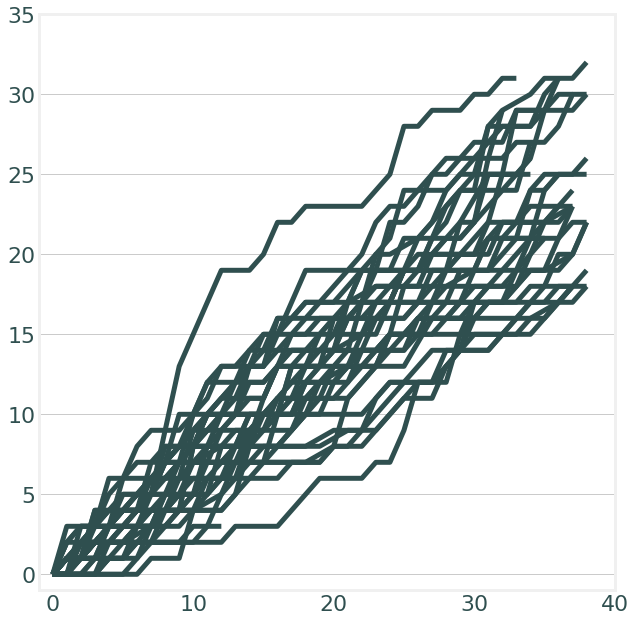

In [21]:
#Plot setup
fig1 = plt.figure()
ax = fig1.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(-1, 40)
ax.set_ylim(-1, 35)
ax.set_xticks(np.arange(0, 50, 10))

#Plot a line for each golden boot winner
x_data = np.array([])
for table_index in range(len(player_golden_boot_match_data)):
    x_data_base = player_golden_boot_match_data[table_index].index.to_numpy()
    x_data = x_data_base + 1
    x_data = np.insert(x_data, 0, 0 )
    y_data = np.insert(player_golden_boot_match_data[table_index]['Sum'].to_numpy(), 0, 0)
    l, = ax.plot(x_data, y_data, "-", color='darkslategray', linewidth=5)

#IMPORTANT: saves the plot as an svg in a buffer
f = io.BytesIO()
fig1.savefig(f, format="svg")

In [22]:
svg_soup = BeautifulSoup(f.getvalue(), 'lxml')
#print(svg_soup.prettify())

/home/anasb/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [23]:
#Need to remove borders and backgrounds so we can
#put a picture behind the plot later.
patch1 = svg_soup.find("g", {"id": "patch_1"})
patch1.decompose()

patch2 = svg_soup.find("g", {"id": "patch_2"})
patch2.decompose()

patch3 = svg_soup.find("g", {"id": "patch_3"})
patch3.decompose()

patch4 = svg_soup.find("g", {"id": "patch_4"})
patch4.decompose()

patch5 = svg_soup.find("g", {"id": "patch_5"})
patch5.decompose()

patch6 = svg_soup.find("g", {"id": "patch_6"})
patch6.decompose()

In [24]:
#Create HTML document
#-The next two lines employs a different approach than the rest
#-because we want to add a lot of html content (not just one element)
html_string = '<!DOCTYPE html><html lang="en"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=0.8"><title>'\
+ page_title + '</title><meta name="description" content="Golden Boot Winners Goals: Running Total"><meta name="author" content="SitePoint"><meta property="og:title" content="'\
+ page_title + '"><meta property="og:type" content="website"><meta property="og:url" content=""><meta property="og:description" content="'\
+ page_description + '"><link rel="stylesheet" href="' + generated_css_filename + '"><link rel="stylesheet" href="' + base_css_filename + '"></head> <body></body></html>'
html_soup = BeautifulSoup(html_string, 'html.parser')

svg_container = html_soup.new_tag('div', id='svg-container')
svg_container.append(svg_soup.svg)
html_soup.body.append(svg_container)

image_container = html_soup.new_tag('div', id='image-container')
image = html_soup.new_tag('img', id='image', src=background_image_url)
image_container.append(image)
gradient_container = html_soup.new_tag('div', attrs={'class': 'gradient diag'})
image_container.append(gradient_container)
gradient_container_h = html_soup.new_tag('div', attrs={'class': 'gradient horizontal'})
image_container.append(gradient_container_h)
gradient_container_v = html_soup.new_tag('div', attrs={'class': 'gradient vertical'})
image_container.append(gradient_container_v)
html_soup.body.insert(0, image_container)

#Creates container for state change buttons
#-(CLEAR, DIM, ALL, RESET)
special_function_button_container = html_soup.new_tag('div', id='special-container')

clear_div_button = html_soup.new_tag('div', id='clear')
clear_div_button.append('CLEAR')
dim_div_button = html_soup.new_tag('div', id='dim')
dim_div_button.append('DIM')
all_div_button = html_soup.new_tag('div', id='all')
all_div_button.append('ALL')
reset_div_button = html_soup.new_tag('div', id='reset')
reset_div_button.append('RESET')

special_function_button_container.append(clear_div_button)
special_function_button_container.append(dim_div_button)
special_function_button_container.append(all_div_button)
special_function_button_container.append(reset_div_button)

#Adds the containers that go at the end of the html body:
#-Creates script tag to include our javascript and then add
#-it to the end of body
new_container = html_soup.new_tag('div', id='player-container')
script_soup = BeautifulSoup('<script src="golden-boot.js"> </script>', 'lxml').find('script')
html_soup.body.append(new_container)
html_soup.body.append(script_soup)

In [25]:
#Adds css classes to lines and also add metadata that may
#be needed to select out a particular season.
for index in range(r):
    player_name_c = table.iat[index,1].split('(')[0].split(' ')

    player_name = ''
    if (player_name_c[-1] == ''):
        player_name = '-'.join(player_name_c[0:-1])
    else:
        player_name = '-'.join(player_name_c)
        
    line_index = 22+index
    line = html_soup.find("g", {"id": "line2d_"+str(line_index)})
    line['class'] = "line " + player_name + " S" + '-'.join(table.iat[index,0].split('–'))
    path = line.find("path")
    #path['class'] = "invis"
    
    #Creates legend
    new_div = html_soup.new_tag('div', attrs={'class': player_name + ' S' + '-'.join(table.iat[index,0].split('–')) + ' picked'})
    date_div = html_soup.new_tag('div', attrs={'class': 'season'})
    date_div.append(table.iat[index,0][2:7])
    name_div = html_soup.new_tag('div', attrs={'class': 'name'})
    name_array = player_name.split('-')

    #-Removes Pierre-Emerick Aubameyang's middle name from his name
    #-because otherwise his name is too long
    if (name_array[1] == 'Emerick' or name_array[1] == 'Floyd'):
        name_array = [name_array[0], name_array[2]]

    name_div.append(' '.join(name_array))
    new_div.append(name_div)
    new_div.append(date_div)
    new_container.append(new_div)

new_container.append(special_function_button_container)

In [26]:
#Saves the html file
#-Note that if Beautiful soup adds some unnecessary stuff before the
#-opening html tag you can extract out the html element using find
filename = html_filename
with open(filename, "w") as file:
    file.write(str(html_soup))

In [27]:
css_root = '@import url("https://fonts.googleapis.com/css2?family=Nunito&display=swap");\n@import url("https://fonts.googleapis.com/css2?family=Roboto&display=swap");\n\n:root {\n  --xaxes-color: ' + xlabel_color + ';\n  --yaxes-color: ' + ylabel_color + ';\n  --gradient-color: ' + gradient_color + ';\n'
css_string = ''

duplicate_check_list = []
for index in range(r):
    player_name_c = table.iat[index,1].split('(')[0].split(' ')

    player_name = ''
    if (player_name_c[-1] == ''):
        player_name = '-'.join(player_name_c[0:-1])
    else:
        player_name = '-'.join(player_name_c)
    
    team_name = table.iat[index, 3].replace('§','')
    if (team_name not in duplicate_check_list):
        dark, light = team_colors[team_name]
        css_root += '  --' + team_name.replace(' ','-') + '-dark: ' + dark + ';\n  --' + team_name.replace(' ','-') + '-light: ' + light + ';\n'
    
    #Generates css for each player. Doing it programmatically simplifies the challenge
    #of implementing/styling based on individual player characteristics.
    if (player_name not in duplicate_check_list):
        css_string += '.' + player_name + ' { \n\n}\n\n' + 'g.' + player_name + ' path { \n  stroke: var(--' + team_name.replace(' ','-') + '-dark) !important;\n}\n\n'\
        + 'div.' + player_name + ' {\n  color: ' + xlabel_color + ';\n -webkit-border-radius: 4px;\n  -moz-border-radius: 4px;\n  border-radius: 4px;\n  border: 2px transparent solid; \n}\n\n'\
        + 'div.' + player_name + ':hover {\n  color: var(--' + team_name.replace(' ','-') + '-light);\n  border: 2px var(--' + team_name.replace(' ','-') + '-light) solid; \n}\n\n'\
        + 'div.' + player_name + ':active {\n  background-color: var(--' + team_name.replace(' ','-') + '-dark);\n  color: var(--' + team_name.replace(' ','-') + '-light);\n  border: 2px var(--' + team_name.replace(' ','-') + '-light) solid; \n}\n\n'\
        + 'div.' + player_name + '.picked {\n  background-color: var(--' + team_name.replace(' ','-') + '-dark);\n  color: var(--' + team_name.replace(' ','-') + '-light);\n  border: 2px var(--' + team_name.replace(' ','-') + '-dark) solid;\n  filter: drop-shadow(0 0 1px #000) !important; \n}\n\n'\
        + 'div.' + player_name + '.picked:hover {\n  background-color: var(--' + team_name.replace(' ','-') + '-dark);\n  color: var(--' + team_name.replace(' ','-') + '-light);\n  border: 2px var(--' + team_name.replace(' ','-') + '-light) solid; \n}\n\n'\
        + player_name + '.name { \n\n}\n\n' + 'div.' + player_name + '.season { \n\n}\n\n'
    
    #Adds css that highlights the added additional player if `highlight_additional_player` tag is true
    if (table.iat[index,0] == additional_player_info['season'] and add_additional_player and highlight_additional_player):
        css_string += 'g.' + player_name + '.S' + '-'.join(table.iat[index,0].split('–')) +' path {\n  stroke: var(--' + team_name.replace(' ','-') + '-light) !important;\n  stroke-width: 1.2% !important;\n  filter: drop-shadow(0 0 3px #fff) !important;\n}\n\n'
    
    #Adds css unique to every entry (golden boot win)
    css_string += '.' + player_name + '.S' + '-'.join(table.iat[index,0].split('–')) +' { \n\n}\n\n'\
    + 'g.' + player_name + '.S' + '-'.join(table.iat[index,0].split('–')) +' path.highlight {\n  stroke: var(--' + team_name.replace(' ','-') + '-light) !important;\n  stroke-width: 1.2% !important;\n  filter: drop-shadow(0 0 4px var(--' + team_name.replace(' ','-') + '-light)) !important;\n}\n\n'
    
    
    duplicate_check_list.append(player_name)
    duplicate_check_list.append(team_name)
    
css_root += '}\n\n'

In [28]:
#Saves the css file
filename = generated_css_filename
with open(filename, "w") as file:
    file.write(css_root + css_string)

In [29]:
%%html
<div style="">
    <iframe src="index.html" width="1300" height="890" style="transform: scale(0.6);margin-top: -140px;margin-left:-160px;margin-right:-160px;margin-bottom:-160px;"></iframe>
</div>